# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)
from sklearn.inspection import permutation_importance

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
#train test split
y = df['price']
X= df.drop(columns = 'price', axis = 1)

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=SEED)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,6,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,4,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [8]:
#column selectors
cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

#column transformers
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse=False)
scaler = StandardScaler()

preprocessor = make_column_transformer((scaler, num_cols), (ohe,cat_cols), remainder='drop')
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000182969BB700>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000182969BBAF0>)])

In [9]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns = feature_names,
                         index = X_train.index )
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns = feature_names,
                         index = X_test.index )
X_test_df.head()

,standardscaler__symboling,standardscaler__wheelbase,standardscaler__carlength,standardscaler__carwidth,standardscaler__carheight,standardscaler__curbweight,standardscaler__cylindernumber,standardscaler__enginesize,standardscaler__boreratio,standardscaler__stroke,standardscaler__compressionratio,standardscaler__horsepower,standardscaler__peakrpm,standardscaler__citympg,standardscaler__highwaympg,onehotencoder__fueltype_diesel,onehotencoder__fueltype_gas,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginetype_dohc,onehotencoder__enginetype_dohcv,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mfi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,onehotencoder__fuelsystem_spfi
48,-0.714920,2.459427,2.089912,1.752050,-0.331061,2.951215,1.423116,3.101778,1.142097,2.906440,-0.522527,1.869686,-0.751829,-1.532551,-1.658942,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,-2.300179,0.957985,1.204773,0.618189,1.037920,0.742762,-0.304953,0.340992,1.710792,-0.402424,-0.189535,0.263760,0.557617,-0.189252,-0.387733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,-0.714920,-0.319103,-0.040979,-0.232207,0.514486,-0.262855,-0.304953,-0.437691,1.104185,-2.056855,-0.308461,-0.565104,-0.651102,-0.338507,-0.246487,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.077709,-0.974905,-0.598288,-0.799137,0.192373,-1.190367,-0.304953,-0.838831,-1.132681,-0.402424,-0.308461,-0.927733,-0.248196,0.855536,1.024722,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,-0.714920,-0.267329,-0.057370,-0.326695,0.433958,-0.450310,-0.304953,-0.154534,0.004708,0.635651,-0.427387,-0.176574,0.154711,0.258514,0.459740,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit-learn-compatible regression model using r-squared and RMSE

    Args:
        model (Regressor): Regression Model with a .predict method
        X_train (DataFrame): Training Features
        y_train (Series): Training Target
        X_test (DataFrame): Test Features
        y_test (Series): Test Target
    """

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [12]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_df, y_train)
evaluate_regression(xgb_reg, X_train_df, y_train, X_test_df, y_test)

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training Data:	R^2= 1.00	RMSE= 236.20
Test Data:	R^2= 0.90	RMSE= 2700.03


In [13]:
feature_importances = pd.Series(xgb_reg.feature_importances_, index = feature_names,
                               name = 'Feature Importance')
feature_importances.head()

standardscaler__symboling    0.001401
standardscaler__wheelbase    0.019486
standardscaler__carlength    0.001908
standardscaler__carwidth     0.002352
standardscaler__carheight    0.001233
Name: Feature Importance, dtype: float32

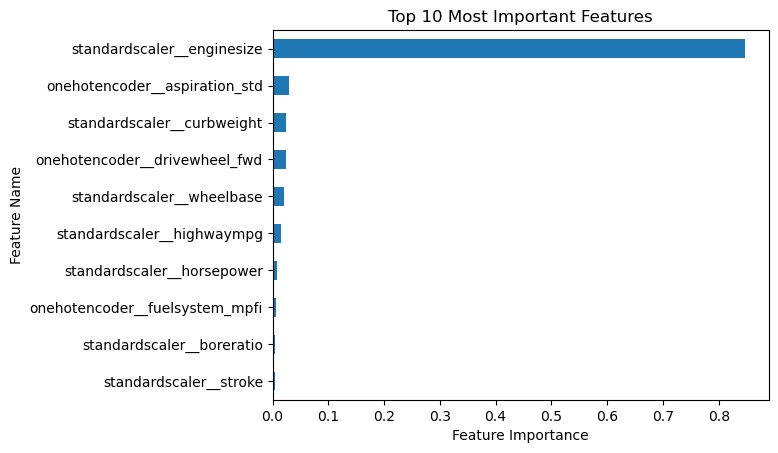

In [14]:
ax = feature_importances.sort_values(ascending=True).tail(10).plot(kind = 'barh')
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

In [15]:
r = permutation_importance(xgb_reg, X_train_df, y_train, n_repeats=5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [17]:
perm_importances = pd.Series(r['importances_mean'], index = X_test_df.columns,
                            name = "Permutation Importance")
perm_importances.head()

standardscaler__symboling    0.005167
standardscaler__wheelbase    0.027031
standardscaler__carlength    0.011662
standardscaler__carwidth     0.018717
standardscaler__carheight    0.008832
Name: Permutation Importance, dtype: float64

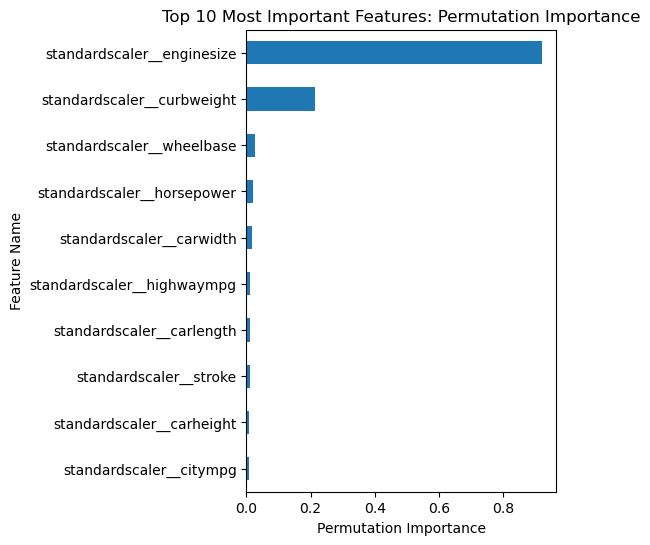

In [18]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');